# 1. Exploratory Data Analysis

## A. Importing Libraries, Modules And Dataset

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


df_train = pd.read_csv('train.csv')

## B. Quick Data Exploration

In [48]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


We have 1460 data rows in our dataset and both numerical and categorical attributes.

Now lets take a look at a statistical summarry of the numerical attributes.

In [50]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Note that some of these features are rather categorical attributes despite having numerical values. For example `MSSubClass` wich identifies the type of dwelling involved in the sale; it has 16 differents values that range from 20 to 190 and each value correspond to a type, for instance 20 : 1-STORY 1946 & NEWER ALL STYLES.

Now we'll select those numerical attributes and see the correlation between them.

In [51]:
numerical_columns = df_train.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


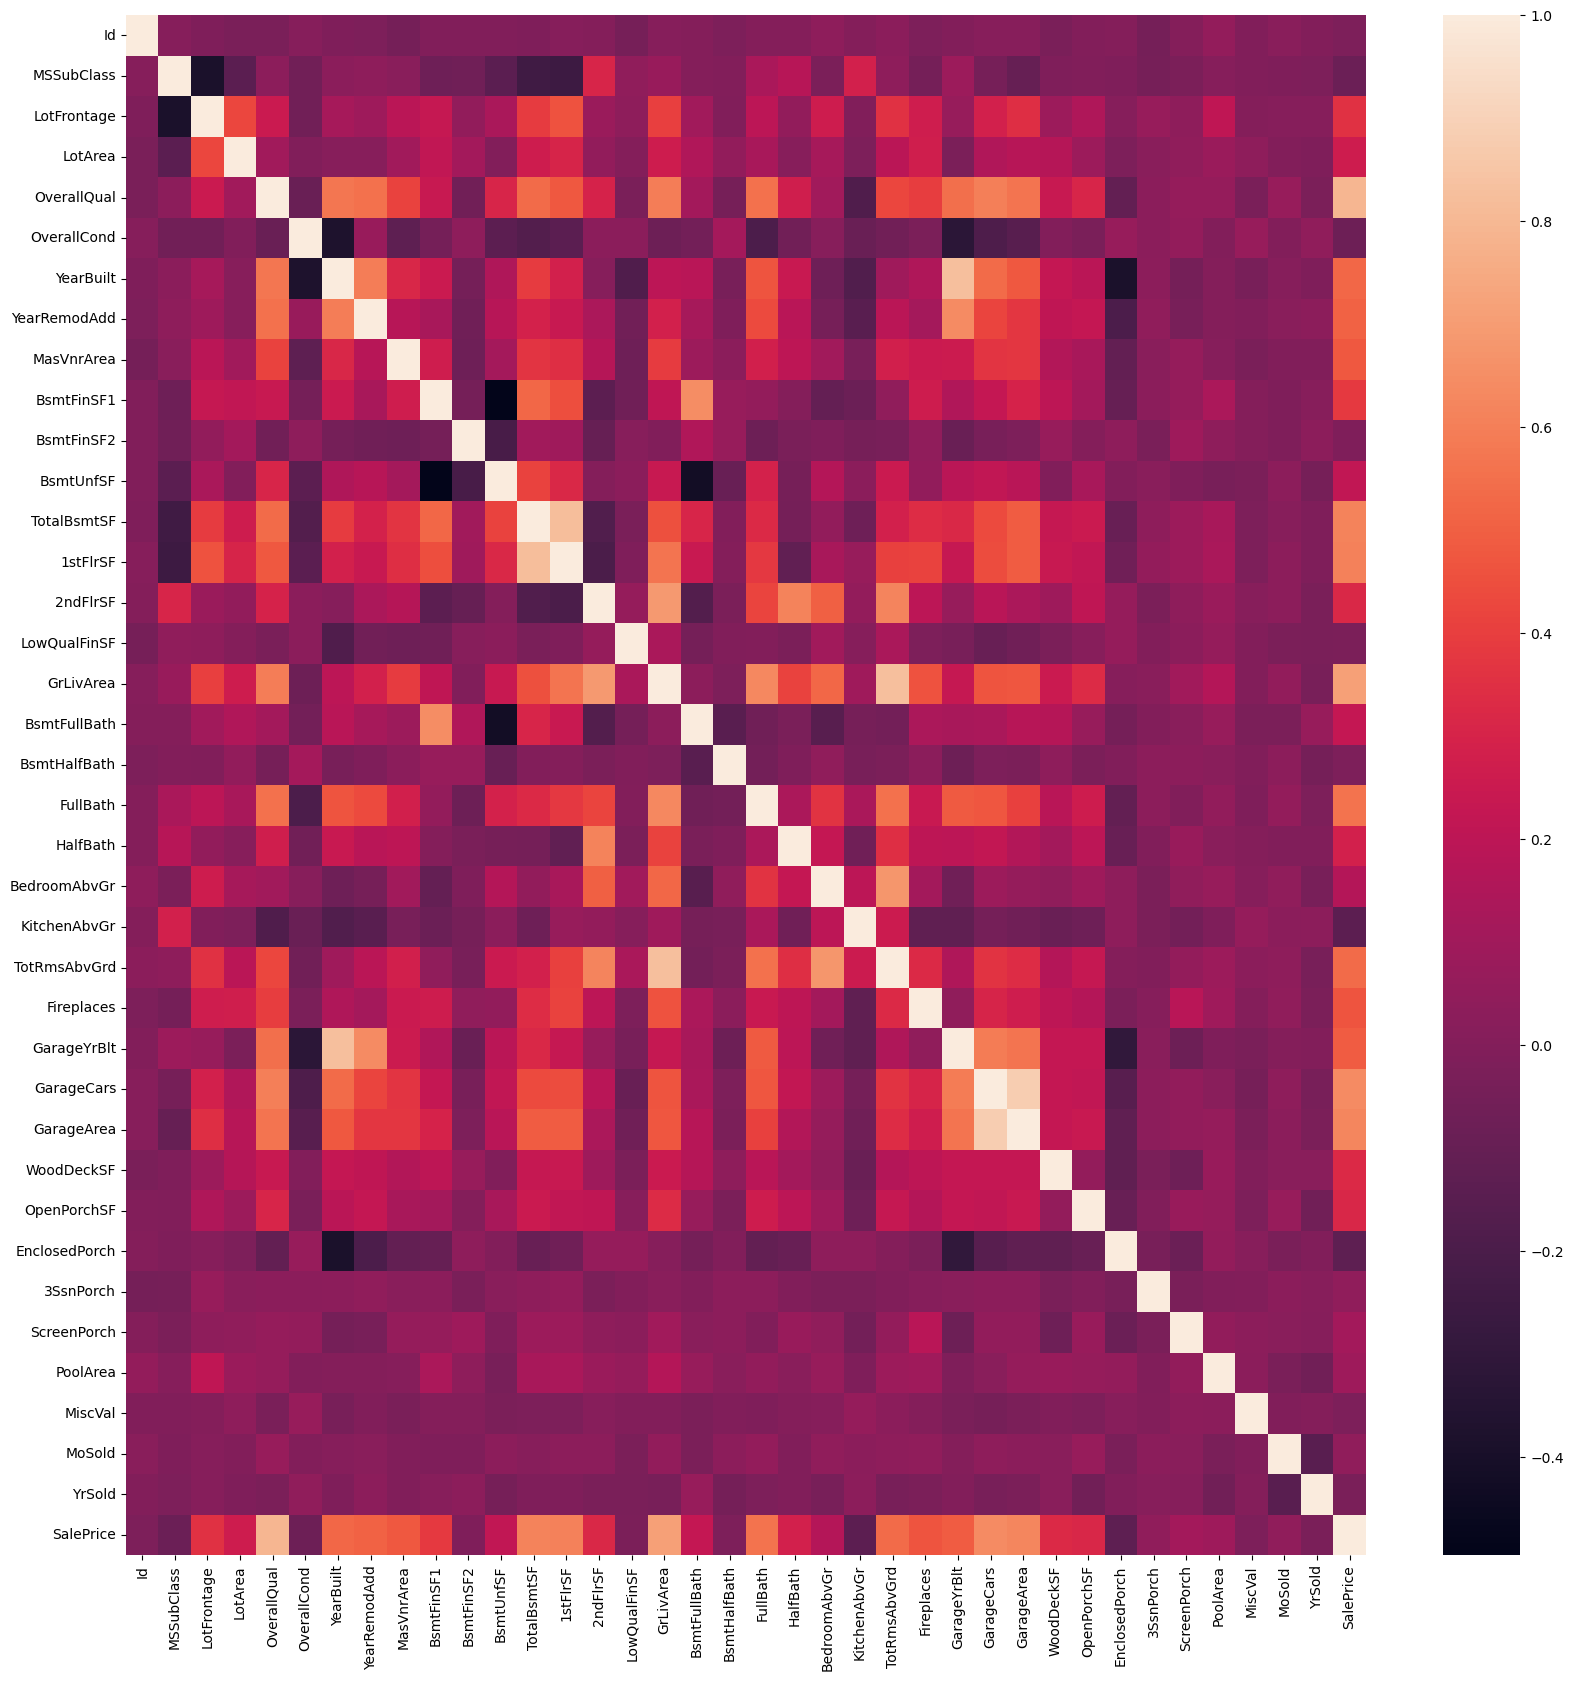

In [52]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_train[numerical_columns].corr())
plt.show()

In [53]:
correlation_matrix = df_train[numerical_columns].corr()

# Get correlations with SalePrice
saleprice_correlation = correlation_matrix["SalePrice"].sort_values(ascending=False)

# Print attributes with noticeable correlation
print(saleprice_correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In this dataset, we're interested in the SalePrice so we'll be interested in the attributes that have some sort of correlation with it.
And by looking at the above heatmap and the correlation matrix, we can easily identify those attributes :

`OverallQual` : Rates the overall material and finish of the house from 1(Very Poor) to 10(Very Excellent).

`GrLivArea` : Above grade (ground) living area square feet.

`GarageCars` : Size of garage in car capacity.

`GarageArea` : Size of garage in square feet.

`TotalBsmtSF` : Total square feet of basement area.

`1stFlrSF` : First Floor square feet.

`FullBath` : Full bathrooms above grade.

`TotRmsAbvGrd` : Total rooms above grade (does not include bathrooms).

`YearBuilt` : Original construction date.

`YearRemodAdd` : Remodel date (same as construction date if no remodeling or additions).

Now let's look at the distribution of these features .

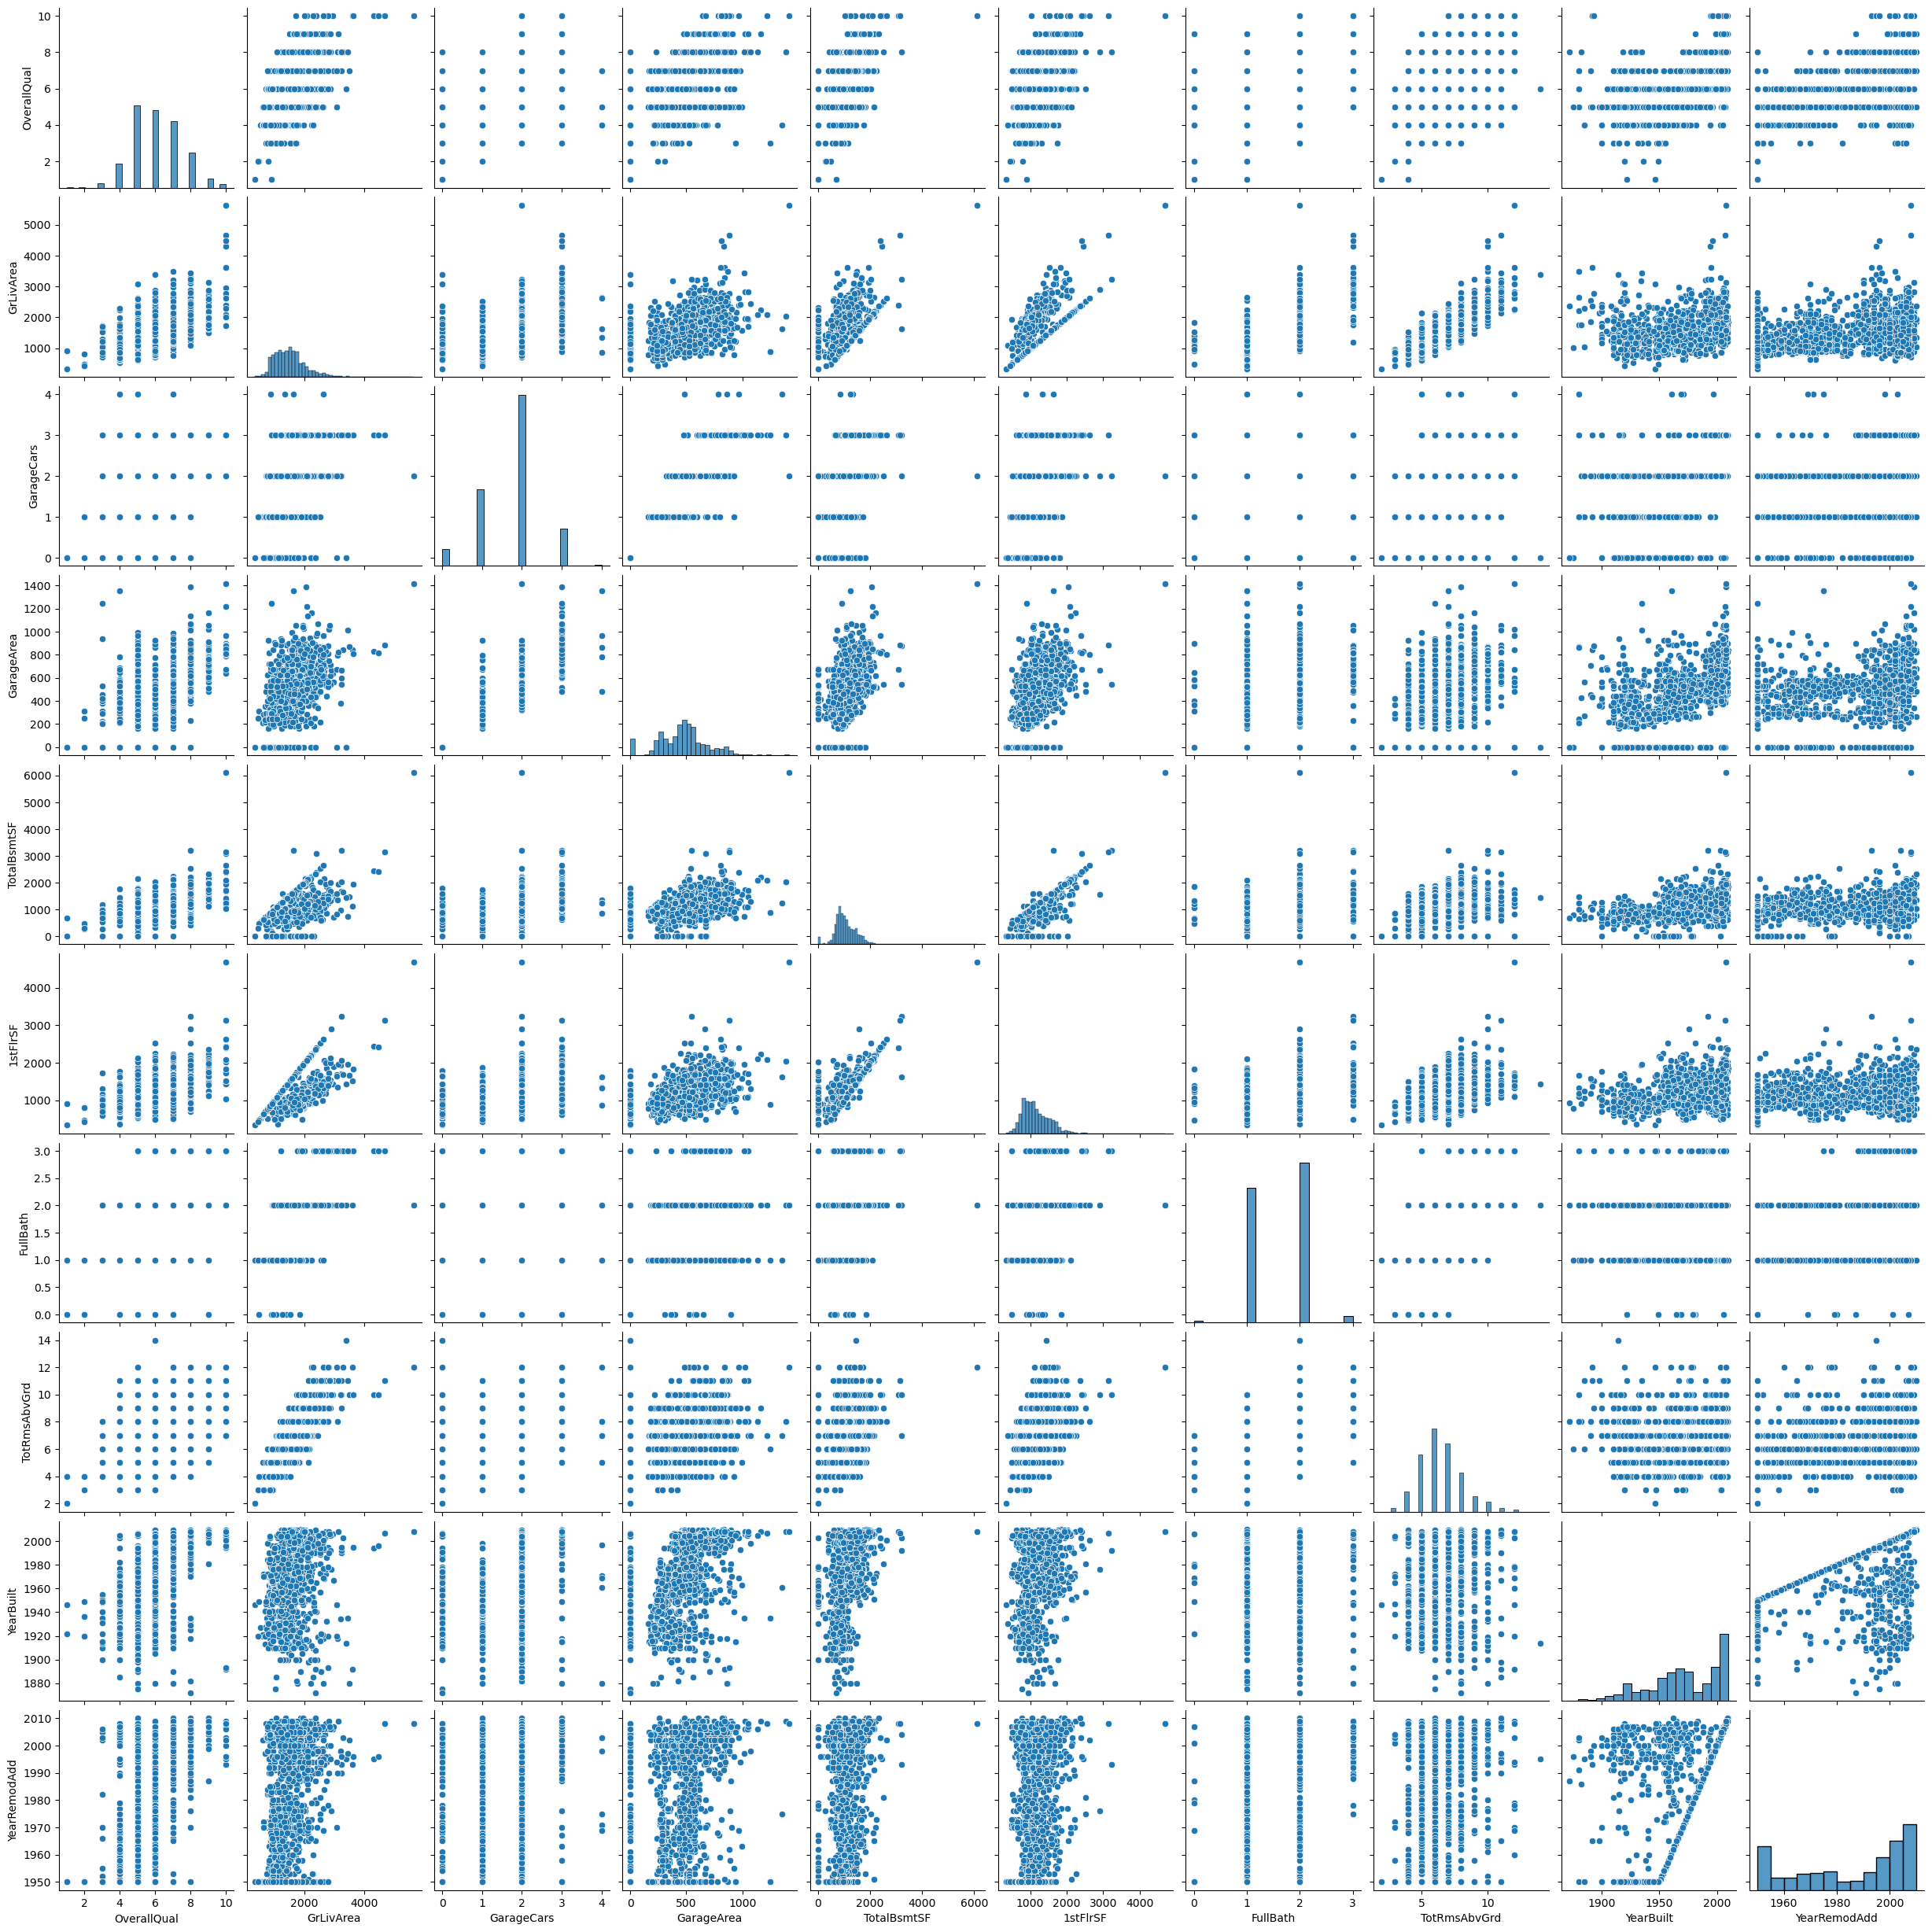

In [54]:
features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']

# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df_train[features].dropna())
plt.show()

A pair plot can be overwhelming at first, but it can also let us quickly identify interesting trends which can be examined further.

Let's look closer at the distribution of some numerical attributes. Let's take, for example, the numerical attributes `SalePrice` and `GrLivArea`. 

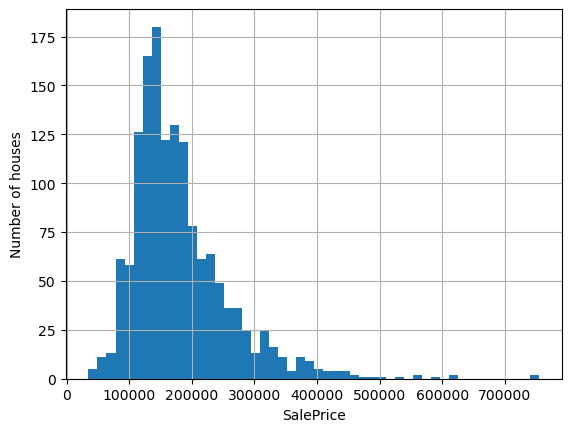

In [55]:
df_train['SalePrice'].hist(bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Number of houses')
plt.show()

The distribution is right-skewed, with fewer houses sold at higher prices, and there are very few houses sold for more than $500,000.

Next, we look at boxp lots to understand the distribution better.

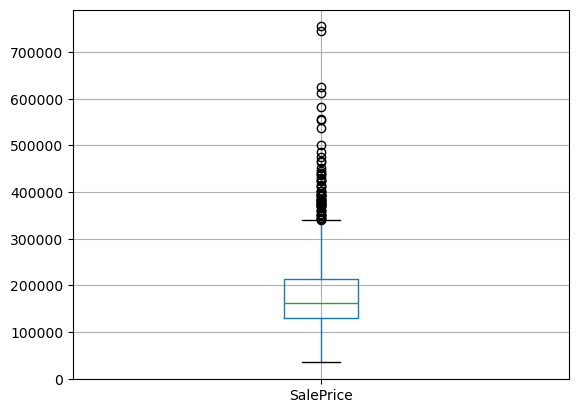

In [56]:
df_train.boxplot(column='SalePrice')
plt.show()

The box plot above confirms the presence of a lot of outliers/extreme values. 

Now for `GrLivArea`

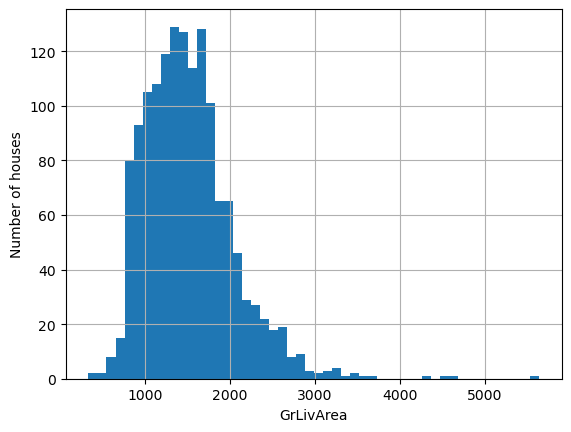

In [57]:
df_train['GrLivArea'].hist(bins=50)
plt.xlabel('GrLivArea')
plt.ylabel('Number of houses')
plt.show()

Similarly as the `SalePrice`, this attirbute follows a right-skewed distribution with the presence of few outliers wich will be more clear in the boxplot. 

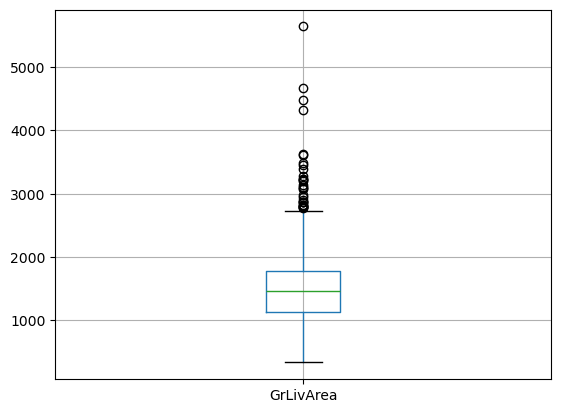

In [58]:
df_train.boxplot(column='GrLivArea')
plt.show()

Now let's look at the categorical variable `OverallQual` wich have the strongest correlation with SalePrice.

Note: even though `OverallQual` has numerical values, it is a categorical attribute.It ranges from 1(Very Poor) to 10(Very Excellent).

First, we'll build a pivot table for `SalePrice` and `OverallQual`, i.e. find the mean `SalePrice` for each value of `OverallQual`.

In [59]:
pivot_table = df_train.pivot_table(values='SalePrice',
                                index='OverallQual',
                                aggfunc=lambda x: x.mean()) 

# Print pivot table
print(pivot_table)

                 SalePrice
OverallQual               
1             50150.000000
2             51770.333333
3             87473.750000
4            108420.655172
5            133523.347607
6            161603.034759
7            207716.423197
8            274735.535714
9            367513.023256
10           438588.388889


# 2. Data Preparation

In this part, we'll start making this data ready for the model; but we'll take only the features mentioned above that have coorrelation with the `SalaePrice`.

In [60]:
df_features = df_train[features]
df_features.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


In [61]:
df_features.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000


From this table, we can notice that the attributes have no missing values; So we won't have to deal with them.

But there is outliers in some attributes wich we can see using boxplots.

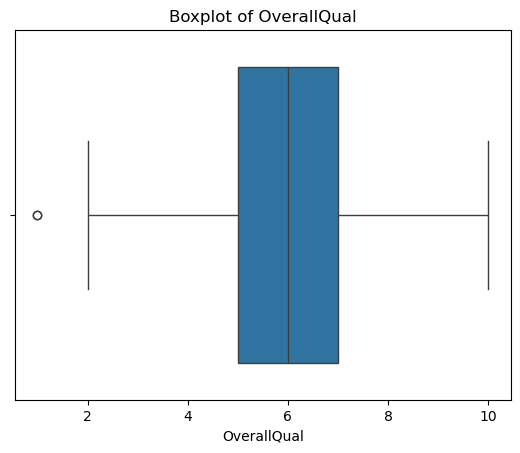

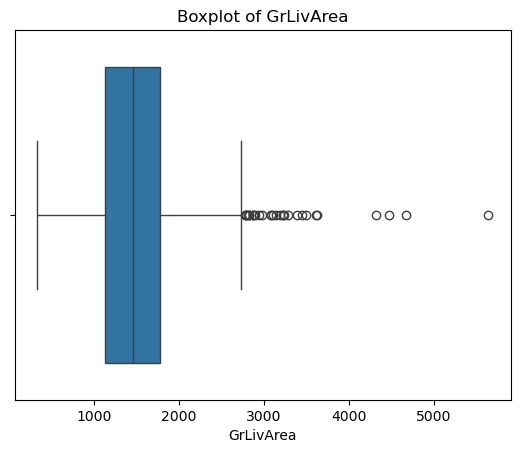

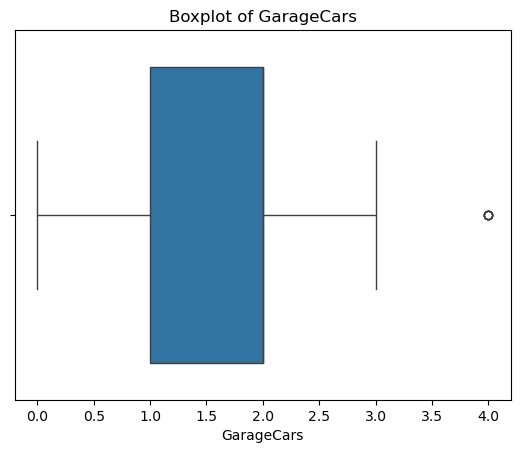

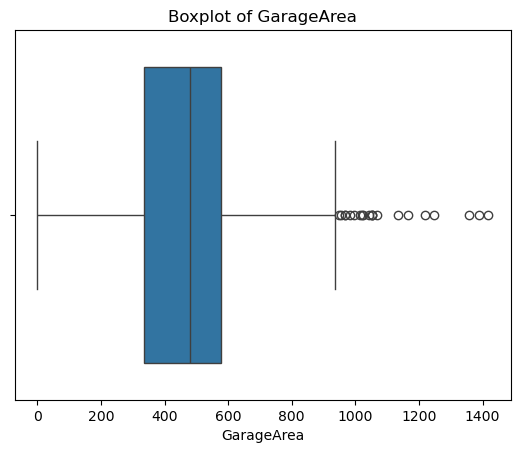

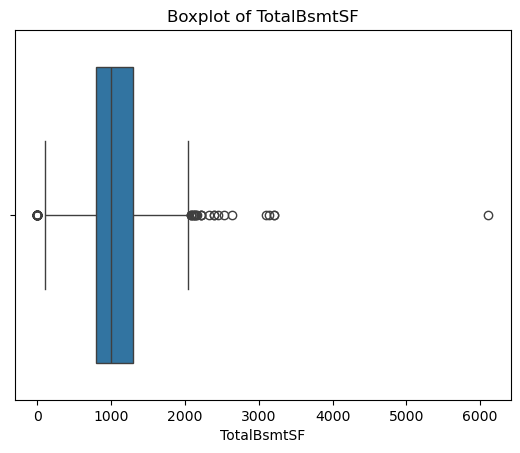

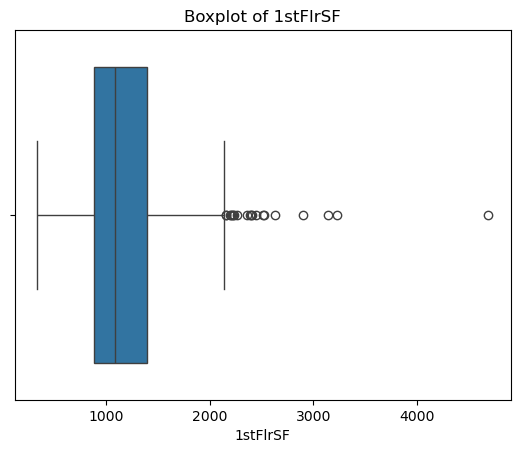

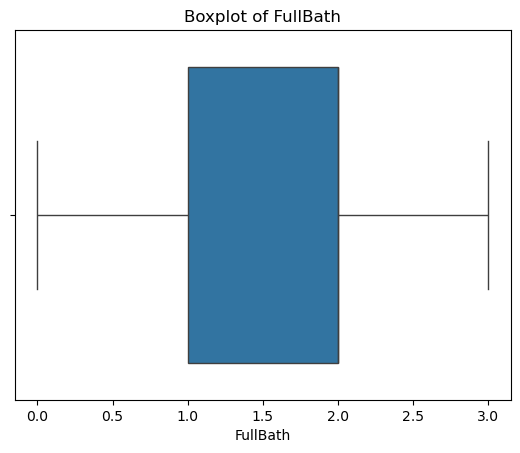

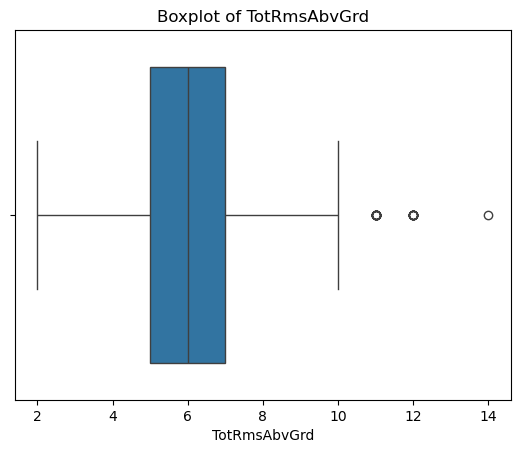

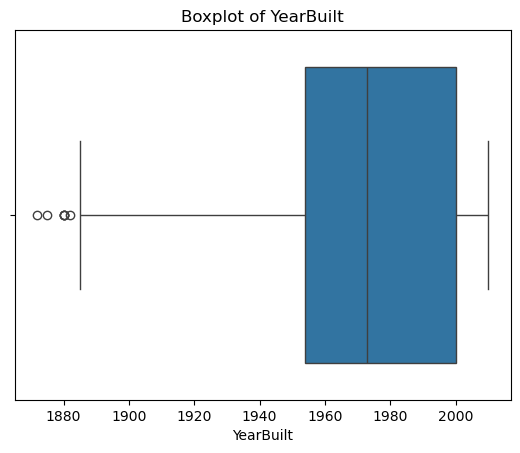

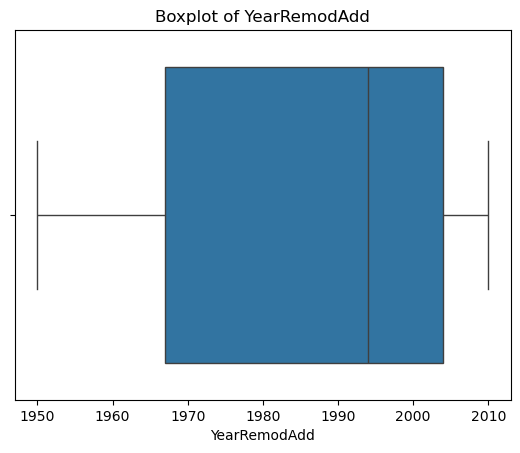

In [62]:
# Create a plot for each column
for i, column in enumerate(df_features.columns):
    plt.figure(i)  
    sns.boxplot(x=df_features[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Instead of ignoring the data rows with extreme values we can transform them to diminish the negative impact of outliers to ML models. A typical way to do this is to scale the comlumns.Many ML algorithms assume that all numerical features are on the same scale.

And we'll also normalize the columns that are not normalize.

First let's look at the distribution of the features before scaling.

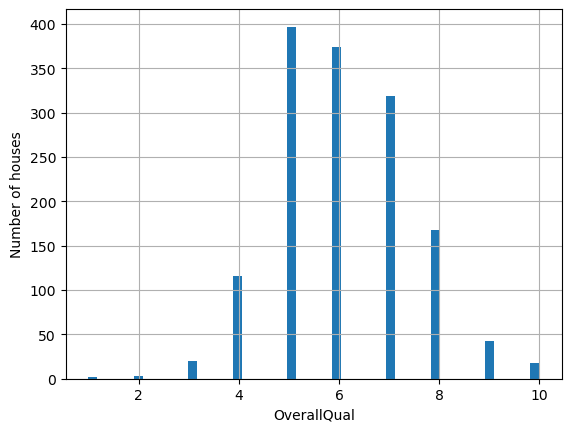

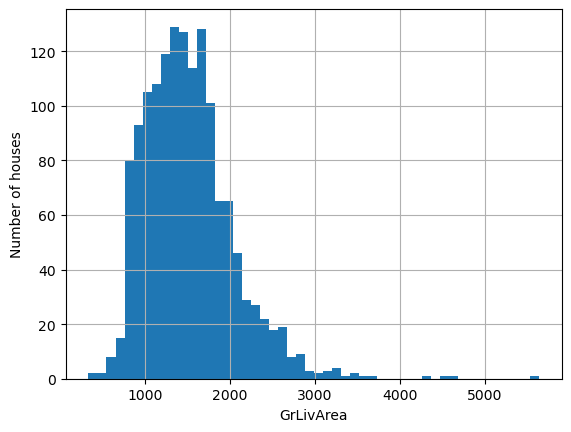

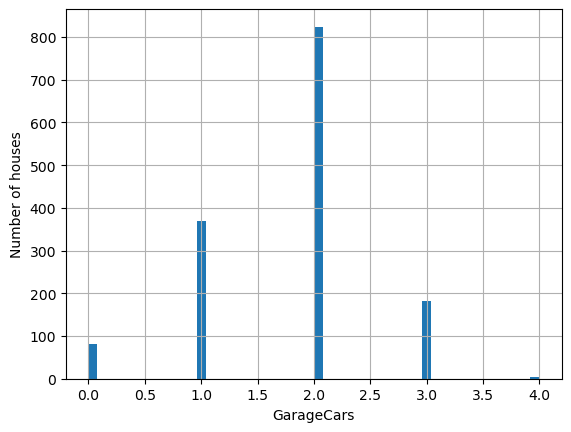

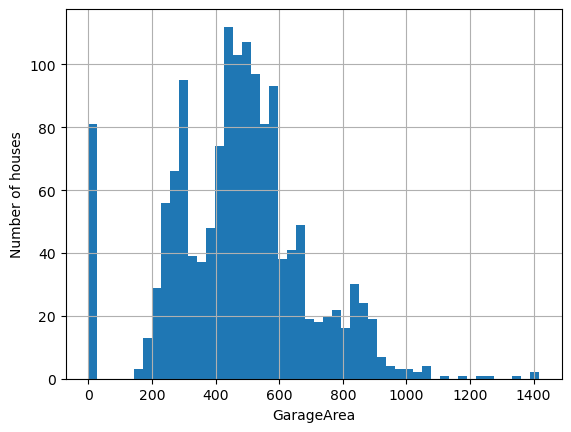

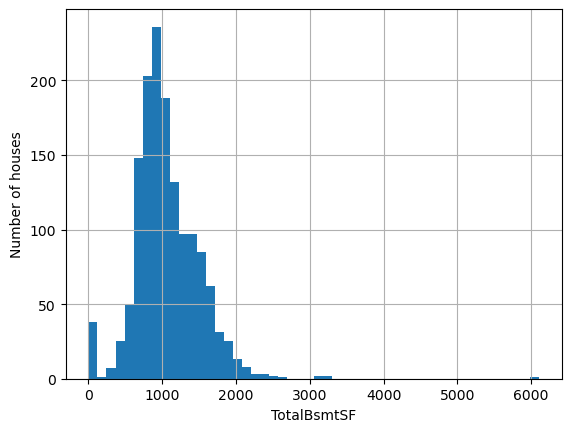

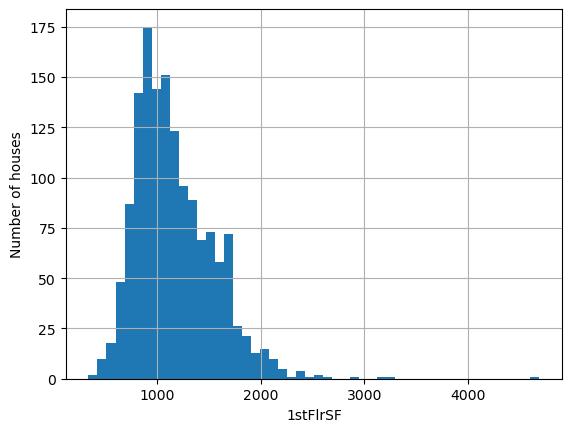

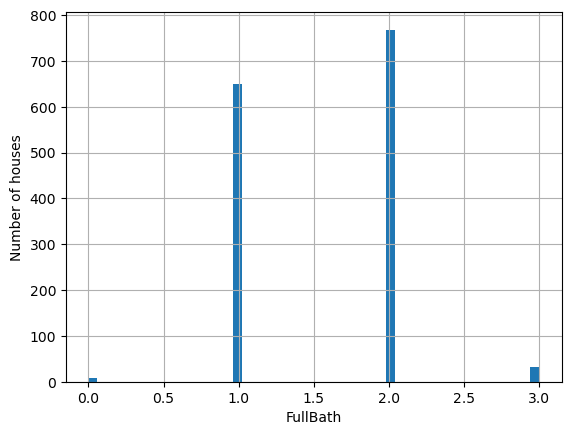

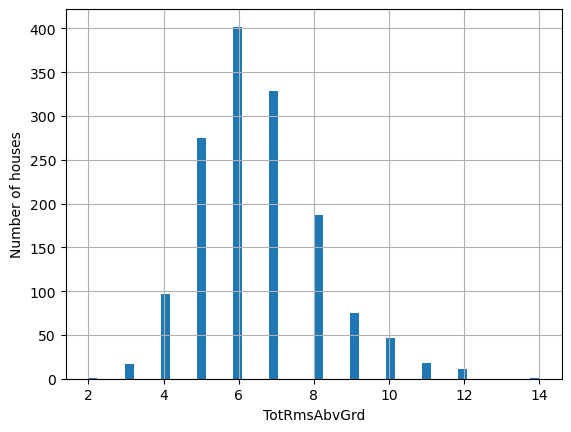

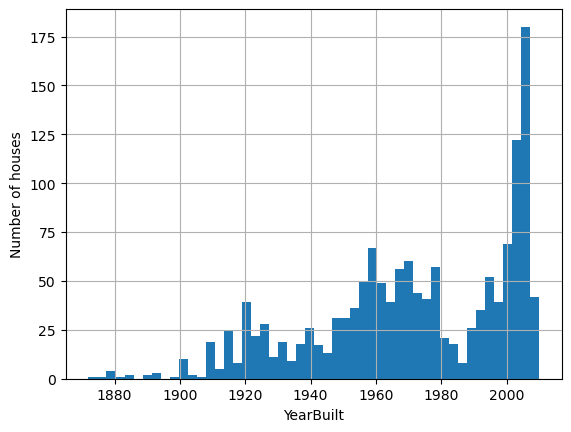

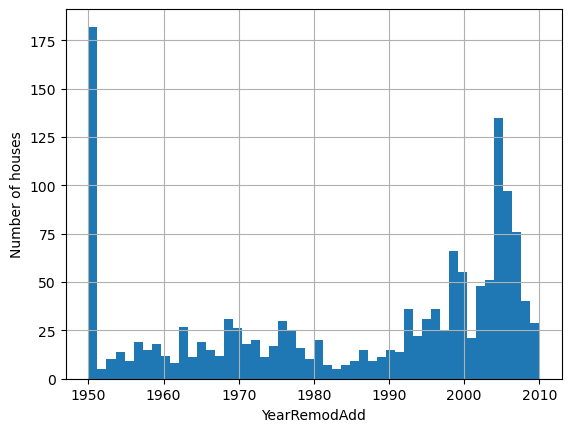

In [63]:
for i, column in enumerate(df_features.columns):
    df_features[column].hist(bins=50)
    plt.xlabel(column)
    plt.ylabel('Number of houses')
    plt.show()

A better way to do this is to define a pipeline in wich we put the scaler and the model as well.

In [64]:
# mix-max scale the data between 0 and 1
robust_scaler = RobustScaler()

# Bundle preprocessing for numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('RScaler', RobustScaler(), features)
    ])

#define the model
RF_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RF_model)
                             ])

# 3. Trainig the model

First, we will cretae *target* and *predictors* and split the dataset into a training and test sets. 

In [65]:
y = df_train['SalePrice']
X = df_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [66]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('RScaler', RobustScaler(),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt',
                                                   'YearRemodAdd'])])),
                ('model', RandomForestRegressor(random_state=0))])

In [67]:
y_predicted = my_pipeline.predict(X_test)

In [68]:
mean_absolute_error(y_test, y_predicted)

18283.197718851927

Now we will use cross-validation for selecting the best parameters for the model.

get_score() a function that reports the average (over five cross-validation folds) MAE of a machine learning pipeline.

The n_estimators parameter supplied to get_score() is used when setting the number of trees in the random forest model.

In [69]:
def get_score(n_estimators):

    my_pipe = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
                  ])
    #Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(my_pipe, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()

Now, we will use the function that we defined to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store the results in a Python dictionary results, where results[i] is the average MAE returned by get_score(i).

In [70]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

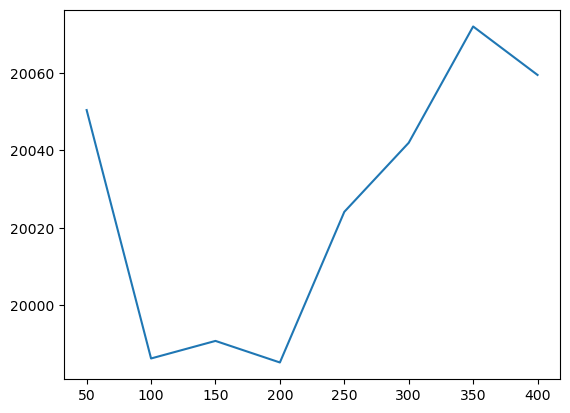

In [71]:
#visualize the results
plt.plot(list(results.keys()), list(results.values()))
plt.show()

Given the results, we can see that 200 is the best n_estimators.

In [72]:
best_n_estimators = 200

we train the model again with the best estimator.

In [73]:
#define the model with the best_n_estimators
RF_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RF_model)
                             ])

In [74]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('RScaler', RobustScaler(),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'YearBuilt',
                                                   'YearRemodAdd'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=0))])

In [75]:
y_predicted = my_pipeline.predict(X_test)
mean_absolute_error(y_test, y_predicted)

18222.84159542712

## 5. Applying the model to the test dataset

In [76]:
df_test = pd.read_csv("test.csv")

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [77]:
df_features_test = df_test[features]

df_features_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992


In [78]:
df_features_test.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
count,1459.000000,1459.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,6.078821,1486.045922,1.766118,472.768861,1046.117970,1156.534613,1.570939,6.385195,1971.357779,1983.662783
std,1.436812,485.566099,0.775945,217.048611,442.898624,398.165820,0.555190,1.508895,30.390071,21.130467
min,1.000000,407.000000,0.000000,0.000000,0.000000,407.000000,0.000000,3.000000,1879.000000,1950.000000
25%,5.000000,1117.500000,1.000000,318.000000,784.000000,873.500000,1.000000,5.000000,1953.000000,1963.000000
50%,6.000000,1432.000000,2.000000,480.000000,988.000000,1079.000000,2.000000,6.000000,1973.000000,1992.000000
75%,7.000000,1721.000000,2.000000,576.000000,1305.000000,1382.500000,2.000000,7.000000,2001.000000,2004.000000
max,10.000000,5095.000000,5.000000,1488.000000,5095.000000,5095.000000,4.000000,15.000000,2010.000000,2010.000000


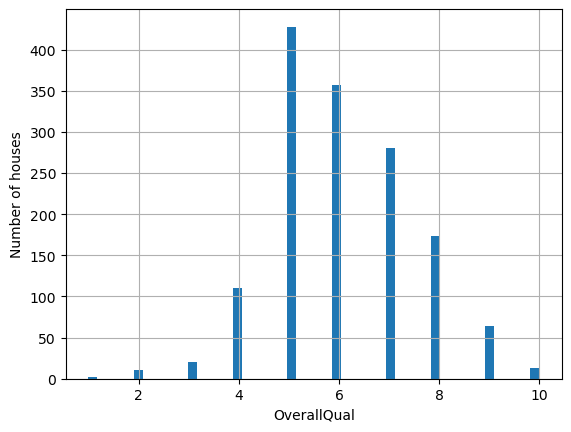

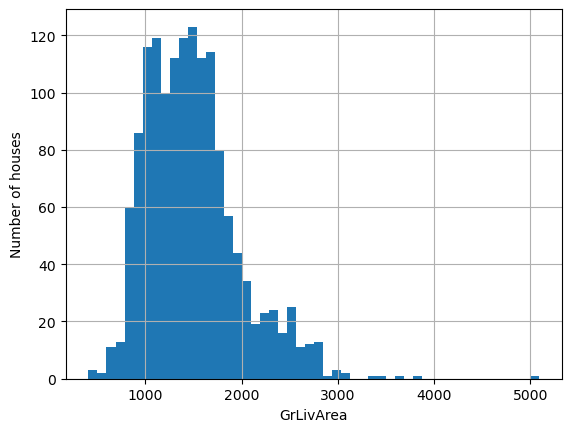

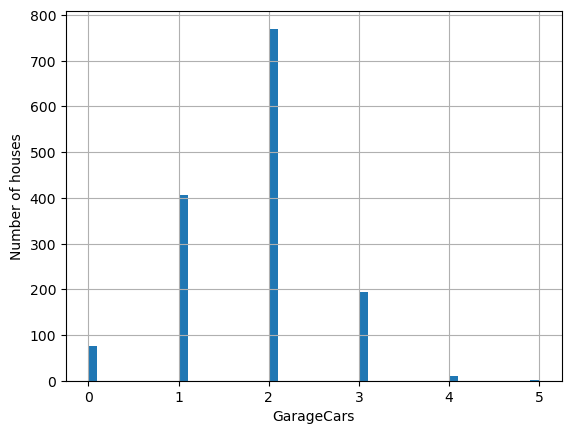

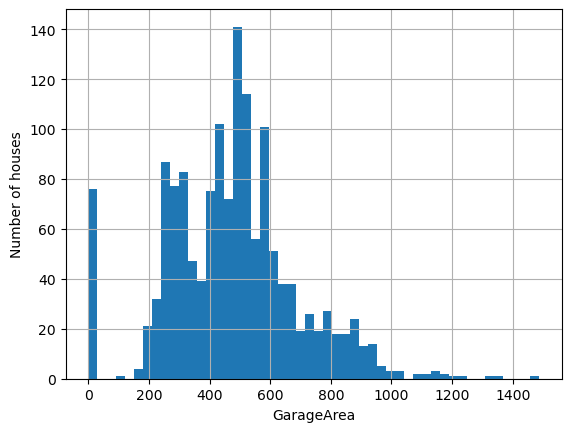

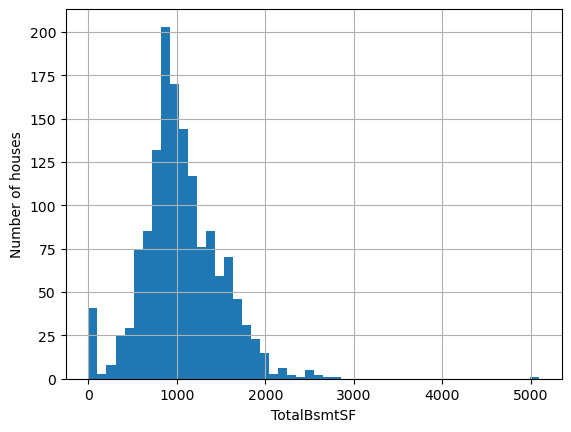

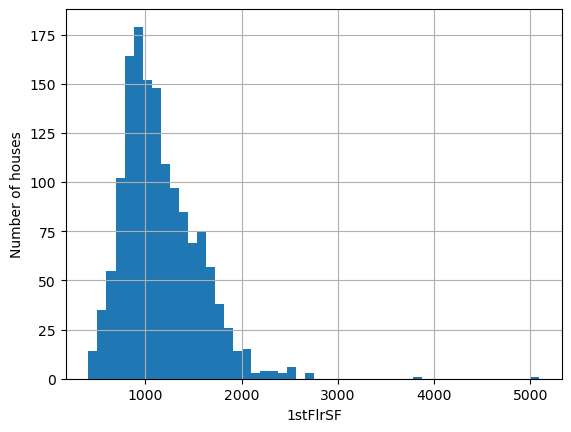

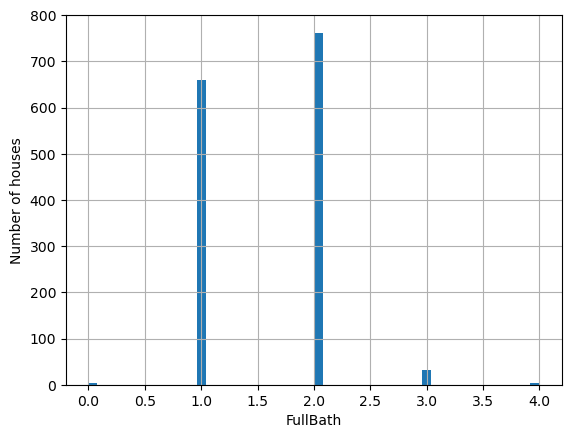

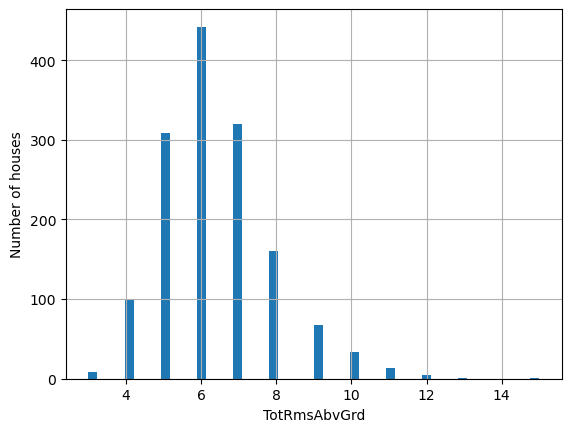

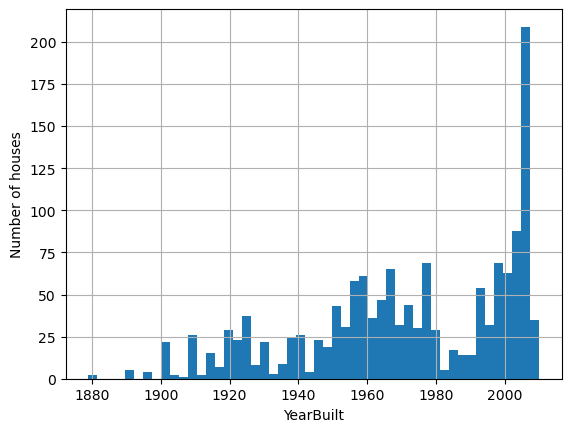

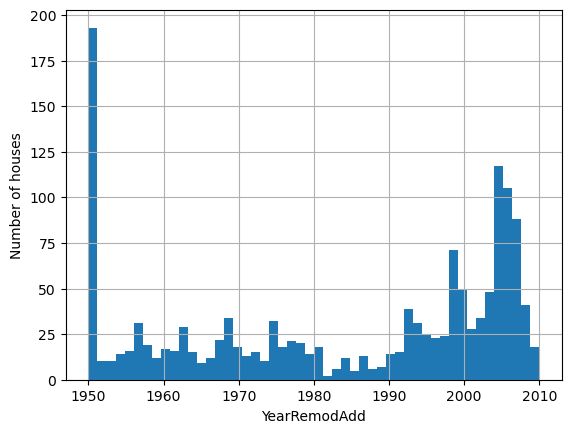

In [79]:
for i, column in enumerate(df_features_test.columns):
    df_features_test[column].hist(bins=50)
    plt.xlabel(column)
    plt.ylabel('Number of houses')
    plt.show()

In [80]:
# Scale and convert back to DataFrame
df_test['SalePrice'] = my_pipeline.predict(df_features_test)

In [81]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,117190.980
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,145512.250
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,176551.320
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,183775.000
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,217413.965


In [99]:
df_test['SalePrice'] = RF_model.predict(X_test)

df_test.head()

c:\Users\ahnta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,124320.50
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,158180.25
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,163947.59
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,184805.00
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,214148.53


In [82]:
df_test[['Id','SalePrice']].to_csv('submission1.csv', index=False)